<a href="https://colab.research.google.com/github/seokhee516/ML-DL-playground/blob/main/_3_1_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 보스턴 주택 가격 모델

### modules import

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터 로드
- 데이터의 수가 상당히 적기 때문에 테스트 데이터의 비율을 20%로 지정

- 13개의 특성을 가짐

- 각각의 특성이 모두 다른 스케일, 즉 단위가 모두 다름
  - 범죄율: 0~1 사이의 값
  - 방의 개수 3~9 사이의 값

- 정답 레이블은 주택 가격의 중간가격($1000 단위)

In [ ]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path= 'boston_housing.npz',
                                                           test_split=0.2, 
                                                           seed =111)

65536/57026 [==================================] - 0s 0us/step


### 데이터 확인

In [ ]:
print("학습 데이터: {}\t레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("테스트 데이터: {}\t레이블: {}".format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
테스트 데이터: (102, 13)	레이블: (102,)


In [ ]:
print(x_train_full[0])

[2.8750e-02 2.8000e+01 1.5040e+01 0.0000e+00 4.6400e-01 6.2110e+00
 2.8900e+01 3.6659e+00 4.0000e+00 2.7000e+02 1.8200e+01 3.9633e+02
 6.2100e+00]


In [ ]:
print(y_train_full[0])

25.0


### 데이터 전처리
- Standardization

- 특성의 단위가 모두 다르기 때문에 **동일한 범위로 조정**

- z = (x-mean())/std()  

[표준 정규분포 데이터 표준화](https://rfriend.tistory.com/268)

In [ ]:
mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

x_train, x_val, y_train, y_val = train_test_split(x_train_preprocessed, y_train_full,
                                                  test_size = 0.3,
                                                  random_state = 111)

In [ ]:
print("학습 데이터: {}\t레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {}\t레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {}\t레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {}\t레이블: {}".format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
학습 데이터: (282, 13)	레이블: (282,)
검증 데이터: (122, 13)	레이블: (122,)
테스트 데이터: (102, 13)	레이블: (102,)


### 모델 구성
- 학습 데이터가 매우 적은 경우에 모델의 깊이를 깊게 할수록  
  과대적합(Overfitting)이 일어날 확률이 높음

In [ ]:
model = Sequential([Dense(100, activation='relu', input_shape=(13,), name ='dense1'),
                    Dense(64, activation='relu', name='dense2'),
                    Dense(32, activation='relu', name='dense3'),
                    Dense(1, name='output')]) # 회귀이므로 output 값은 1

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 100)               1400      
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 9,977
Trainable params: 9,977
Non-trainable params: 0
_________________________________________________________________


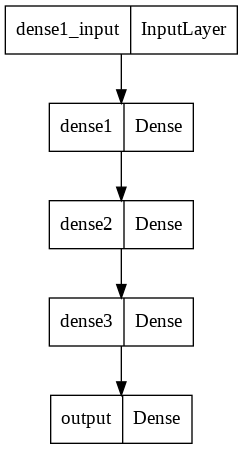

In [ ]:
plot_model(model)

### 모델 컴파일(compile)

- 회귀 문제에서는 주로 평균제곱오차(MSE, Mean Squared Error)를 손실함수로,  
  평균절대오차(MAE, Mean Absolute Error)를 평가지표로 많이 사용!

In [ ]:
model.compile(loss='mse',
              optimizer=Adam(learning_rate=1e-2),
              metrics=['mae'])

- loss: 손실함수. 훈련셋과 연관. 훈련에 사용. 
- metric: 평가지표. 검증셋과 연관. 훈련 과정을 모니터링하는데 사용.

loss는 손실함수를 의미합니다. 모델을 훈련시킬때 이 손실 함수를 최소로 만들어주는 가중치들을 찾는 것을 목표로 삼습니다.자신이 훈련시키는 모델에 적합한 손실함수를 선택해주면 됩니다.

metric은 평가지표입니다. 검증셋에서 훈련된 모델의 성능을 평가할 때 어떤 평가지표로 평가할지를 결정해줍니다. 학습곡선을 그릴 때 손실함수와 평가지표를 에포크(epoch)마다 계산한 것을 그려주는데, 손실함수의 추이와 평가지표의 추이를 비교해보면서 모델이 과대적합(overfit) 또는 과소적합(underfit)되고 있는지 여부를 확인할 수 있습니다. 

[손실함수와 평가지표 차이](https://bskyvision.com/740)

### 모델 학습

In [ ]:
history = model.fit(x_train, y_train, epochs=300,
                    validation_data=(x_val, y_val))

Epoch 1/300
9/9 [==============================] - 2s 59ms/step - loss: 285.1888 - mae: 14.0729 - val_loss: 132.4612 - val_mae: 9.1090
Epoch 2/300
9/9 [==============================] - 0s 13ms/step - loss: 60.9891 - mae: 5.9218 - val_loss: 31.4368 - val_mae: 4.4589
Epoch 3/300
9/9 [==============================] - 0s 10ms/step - loss: 33.7114 - mae: 4.2293 - val_loss: 22.2753 - val_mae: 3.6017
Epoch 4/300
9/9 [==============================] - 0s 12ms/step - loss: 21.5946 - mae: 3.4391 - val_loss: 13.9826 - val_mae: 2.9190
Epoch 5/300
9/9 [==============================] - 0s 11ms/step - loss: 16.3538 - mae: 2.8935 - val_loss: 11.7222 - val_mae: 2.7147
Epoch 6/300
9/9 [==============================] - 0s 10ms/step - loss: 13.6432 - mae: 2.5889 - val_loss: 10.9746 - val_mae: 2.5883
Epoch 7/300
9/9 [==============================] - 0s 7ms/step - loss: 12.6475 - mae: 2.4426 - val_loss: 9.1843 - val_mae: 2.3985
Epoch 8/300
9/9 [==============================] - 0s 14ms/step - loss: 12.

### 모델 평가 
- `evaluate()`

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 13.9617 - mae: 2.6247


[13.961652755737305, 2.624713659286499]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


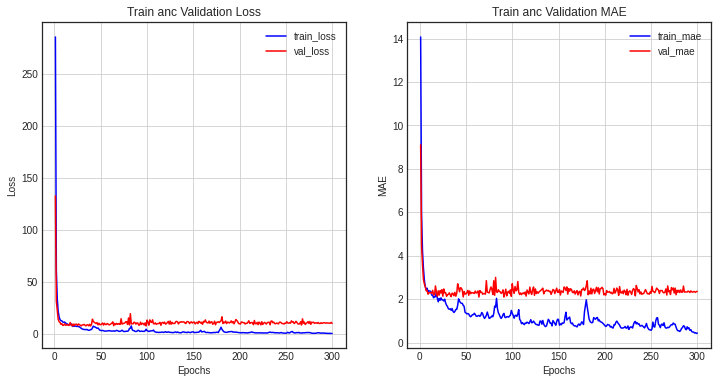

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train anc Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, mae, color='blue', label='train_mae')
ax2.plot(epochs, val_mae, color='red', label='val_mae')
ax2.set_title('Train anc Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

- loss가 급하게 줄어들고 그 후엔 거의 변화가 없음

### K-Fold 교차 검증

- 데이터셋의 크기가 매우 작은 경우에  
  [훈련, 검증, 테스트] 데이터로 나누게 되면 과소적합이 일어날 확률이 높음

- 이를 해결하기 위해 K-Fold 교차 검증 실행
  <br>

  <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="600">

  <sub>출처: https://scikit-learn.org/stable/modules/cross_validation.html</sub>

### 모델 재구성

In [15]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold

In [28]:
tf.random.set_seed(2)
(x_train_full, y_train_full), (x_test, y_test) = load_data(path = 'boston_housing.npz', 
                                                           test_split = 0.2, seed = 2)

mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / mean

In [29]:
k = 3
# shuffle=True 넣어주어야 오류 안남
kfold = KFold(n_splits=k, shuffle=True, random_state=2)

In [18]:
def build_model():
  input = Input(shape = (13, ), name = 'input')
  hidden1 = Dense(100, activation = 'relu', name = 'dense1')(input)
  hidden2 = Dense(64, activation = 'relu', name = 'dense2')(hidden1)
  hidden3 = Dense(32, activation = 'relu', name = 'dense3')(hidden2)
  output = Dense(1, name = 'output')(hidden3)

  model = Model(inputs = [input], outputs = output)
  model.compile(loss = 'mse', 
                optimizer = 'adam',
                metrics = ['mae'])
  return model

In [30]:
mae_list = []

In [10]:
x_train_full.shape

(404, 13)

In [12]:
x_train_full

array([[9.1780e-02, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9550e+02,
        9.0400e+00],
       [5.6440e-02, 4.0000e+01, 6.4100e+00, ..., 1.7600e+01, 3.9690e+02,
        3.5300e+00],
       [1.0574e-01, 0.0000e+00, 2.7740e+01, ..., 2.0100e+01, 3.9011e+02,
        1.8070e+01],
       ...,
       [3.0410e-02, 0.0000e+00, 5.1900e+00, ..., 2.0200e+01, 3.9481e+02,
        1.0560e+01],
       [5.2058e-01, 0.0000e+00, 6.2000e+00, ..., 1.7400e+01, 3.8845e+02,
        9.5400e+00],
       [2.5199e-01, 0.0000e+00, 1.0590e+01, ..., 1.8600e+01, 3.8943e+02,
        1.8060e+01]])

In [9]:
x_train_preprocessed.shape

(404, 13)

In [13]:
x_train_preprocessed

array([[-0.40544083, -0.4772386 , -1.03573484, ..., -0.87342724,
         0.42641956, -0.51858417],
       [-0.40931521,  1.17295413, -0.69454082, ..., -0.40931491,
         0.44164612, -1.27340753],
       [-0.40391037, -0.4772386 ,  2.38921699, ...,  0.75096592,
         0.36779731,  0.7184494 ],
       ...,
       [-0.41216892, -0.4772386 , -0.87092078, ...,  0.79737715,
         0.41891504, -0.31035704],
       [-0.35843076, -0.4772386 , -0.72490131, ..., -0.50213738,
         0.34974296, -0.4500884 ],
       [-0.38787674, -0.4772386 , -0.0902226 , ...,  0.05479742,
         0.36040155,  0.71707948]])

In [11]:
for train_idx, val_idx in kfold.split(x_train_full):
  print("train_idx", train_idx)
  print("val_idx", val_idx)

train_idx [  1   2   4   6   8  10  11  12  13  14  20  21  23  26  27  28  29  32
  34  35  36  37  38  40  41  43  44  47  48  49  50  51  52  53  54  58
  59  61  62  64  65  67  68  69  71  74  80  81  83  85  86  87  88  89
  91  92  95  96  97  98  99 100 102 103 105 106 107 111 112 115 117 119
 120 121 122 123 125 127 128 129 130 133 134 135 136 138 139 142 143 144
 146 147 149 150 151 152 154 156 159 160 161 162 163 164 166 167 169 170
 171 174 175 178 179 182 183 184 185 186 187 188 189 190 191 193 194 196
 197 198 199 200 201 202 203 204 205 206 207 208 210 212 213 214 215 216
 217 220 221 222 224 225 226 227 228 229 230 231 233 235 236 237 238 240
 241 242 243 244 246 251 252 254 256 257 258 259 260 261 262 263 264 267
 269 270 272 273 274 275 276 278 279 280 281 282 284 285 286 288 289 290
 291 292 293 294 295 299 300 301 303 305 306 307 308 309 310 313 314 315
 318 319 320 321 322 325 326 328 330 333 334 336 339 340 342 343 344 345
 346 347 348 349 353 355 356 357 359 360 

In [31]:
for train_idx, val_idx in kfold.split(x_train_full): # 영상에서는 x_train이지만 x_train_full인듯. val은 kfold로 나눠주니까..?
  x_train_fold, x_val_fold = x_train_preprocessed[train_idx], x_train_preprocessed[val_idx]
  y_train_fold, y_val_fold = y_train_full[train_idx], y_train_full[val_idx] 

  model = build_model()
  model.fit(x_train_fold, y_train_fold, epochs = 300, 
            validation_data = (x_val_fold, y_val_fold)) 
  
  _, test_mae = model.evaluate(x_test, y_test) # loss(mse), mae 중 mae 만 사용
  mae_list.append(test_mae)

Epoch 1/300
9/9 [==============================] - 1s 27ms/step - loss: 567.6244 - mae: 21.9644 - val_loss: 651.1479 - val_mae: 23.4676
Epoch 2/300
9/9 [==============================] - 0s 8ms/step - loss: 531.3921 - mae: 21.1137 - val_loss: 605.3729 - val_mae: 22.4769
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 481.2886 - mae: 19.8492 - val_loss: 533.7692 - val_mae: 20.8661
Epoch 4/300
9/9 [==============================] - 0s 8ms/step - loss: 402.8825 - mae: 17.7441 - val_loss: 423.5675 - val_mae: 18.2305
Epoch 5/300
9/9 [==============================] - 0s 7ms/step - loss: 292.6801 - mae: 14.5345 - val_loss: 275.3006 - val_mae: 14.0309
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 173.8666 - mae: 10.7076 - val_loss: 134.7271 - val_mae: 9.0648
Epoch 7/300
9/9 [==============================] - 0s 8ms/step - loss: 95.4127 - mae: 7.6371 - val_loss: 75.5833 - val_mae: 6.6386
Epoch 8/300
9/9 [==============================] - 0s 7ms/s

In [32]:
print(mae_list)

[6.581082344055176, 8.70215892791748, 8.746434211730957]


In [33]:
print(np.mean(mae_list))

8.009891827901205


- mae 높게 나옴
- seed 바꿔가면서 돌림
- mae 8.xx 8000달러 오차


In [34]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 142.1956 - mae: 8.7464


[142.19558715820312, 8.746434211730957]